# Support Vector Machine (SVM)

**Support Vector Machine (SVM)** is a supervised learning algorithm that can be used for both classification and regression tasks, although it is mostly used for classification. The idea behind SVM is to find a hyperplane that best separates the data into different classes. In the case of your project, you are predicting whether a customer will subscribe to a term deposit, making this a binary classification problem.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,accuracy_score, \
                            precision_score, recall_score,f1_score,roc_auc_score
from sklearn.svm import SVC

In [4]:
X_train = pd.read_csv('dataset/X_train_smote.csv.', sep = ';')
y_train = pd.read_csv('dataset/y_train_smote.csv.', sep = ';')
X_test = pd.read_csv('dataset/X_test.csv.', sep = ';')
y_test = pd.read_csv('dataset/y_test.csv.', sep = ';')

In [5]:
print(X_train.shape)
print(y_train.shape)

(38359, 55)
(38359, 1)


In [6]:
print(X_test.shape)
print(y_test.shape)

(6096, 55)
(6096, 1)


## SVM Model

In [7]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

In [8]:
%%time 
svm_model.fit(X_train, y_train)

CPU times: total: 5min 1s
Wall time: 5min 48s


SVC(probability=True)

In [9]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test)
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1] 

In [10]:
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.900754593175853
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5309
           1       0.62      0.60      0.61       787

    accuracy                           0.90      6096
   macro avg       0.78      0.77      0.78      6096
weighted avg       0.90      0.90      0.90      6096



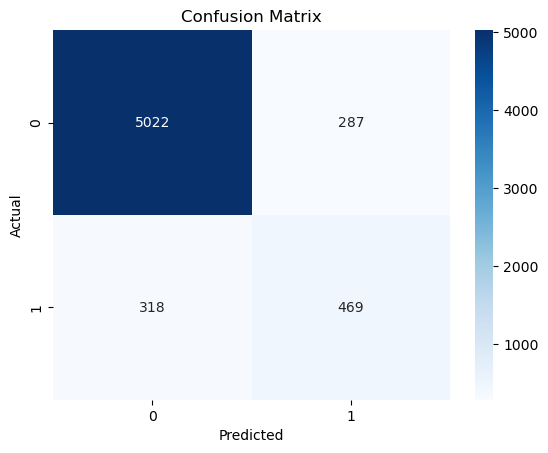

In [11]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba)

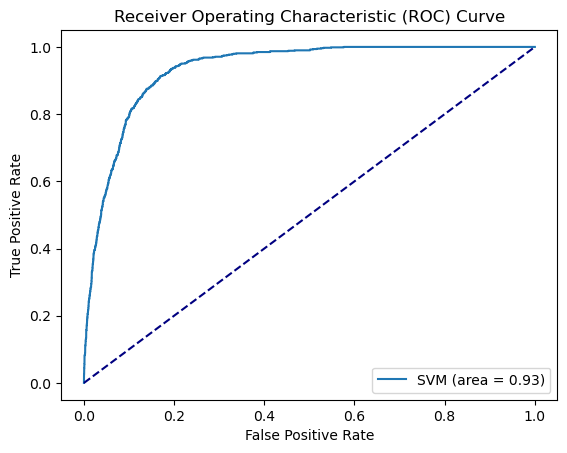

In [13]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance in SVM

In SVM, particularly when using the SVC class from sklearn, feature importance is not directly available like in tree-based models. However, you can interpret feature importance in a few ways:

**1. Using Coefficients (Linear Kernel Only)**
If you use a linear kernel, you can get feature importance from the coefficients of the model. However, since you're using an RBF kernel, this method doesn't apply.

**2. Using Permutation Importance**
Permutation importance is a model-agnostic way to assess feature importance. It works by measuring how much the model's accuracy decreases when the values of a feature are randomly shuffled.

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
# Use a smaller sample of X_test and y_test
X_test_sample = X_test[:100]  # Adjust this based on your dataset size
y_test_sample = y_test[:100]

In [16]:
# Calculate permutation importance
result = permutation_importance(svm_model, X_test_sample, y_test_sample, n_repeats=10, random_state=42, n_jobs=-1)

In [17]:
# Get feature importances
importances = np.abs(result.importances_mean)

In [18]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


In [19]:
importance_df.head(15)

,Feature,Importance
1,euribor3m,0.055
3,duration,0.045
31,housing_no,0.045
50,day_of_week_tue,0.038
27,education_professional.course,0.027
40,month_jul,0.027
49,day_of_week_thu,0.020
52,poutcome_failure,0.020
9,job_blue-collar,0.020
6,cons.price.idx,0.020


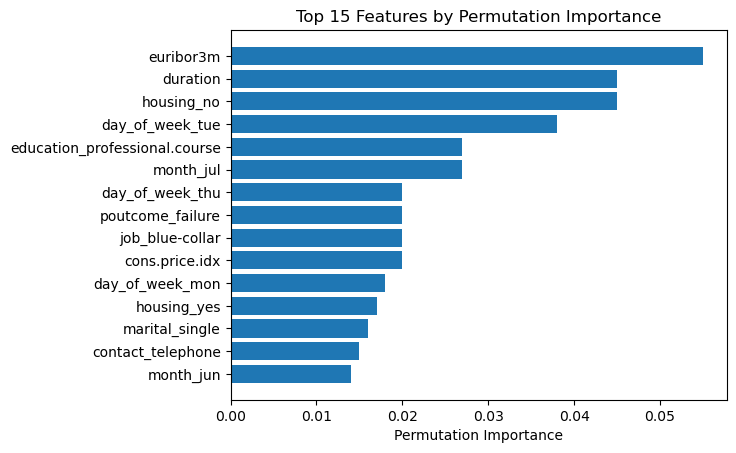

In [20]:
# Plot only the top 15 most important features
plt.barh(importance_df.Feature.head(15),importance_df.Importance.head(15))
plt.xlabel("Permutation Importance")
plt.title("Top 15 Features by Permutation Importance")
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

In [21]:
top_15_features=importance_df.Feature.head(15)

In [22]:
X_train_15 = X_train[top_15_features]
X_test_15 = X_test[top_15_features]

In [23]:
%%time
# Train the model with top 15 features
svm_model.fit(X_train_15, y_train)

CPU times: total: 4min 34s
Wall time: 4min 49s


SVC(probability=True)

In [24]:
# Predict on the test set
y_pred_15 = svm_model.predict(X_test_15)
y_pred_15_proba = svm_model.predict_proba(X_test_15)[:, 1] 

In [25]:
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_15))
print(classification_report(y_test, y_pred_15))

SVM Performance:
Accuracy: 0.8538385826771654
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      5309
           1       0.46      0.80      0.59       787

    accuracy                           0.85      6096
   macro avg       0.71      0.83      0.75      6096
weighted avg       0.90      0.85      0.87      6096



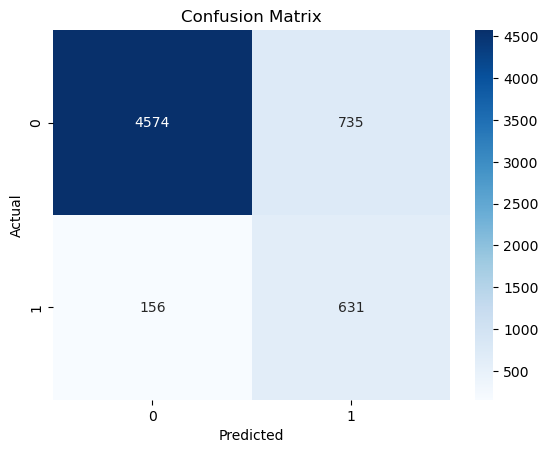

In [26]:
cm = confusion_matrix(y_test, y_pred_15)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
roc_auc_svm_15 = roc_auc_score(y_test, y_pred_15_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_15_proba)

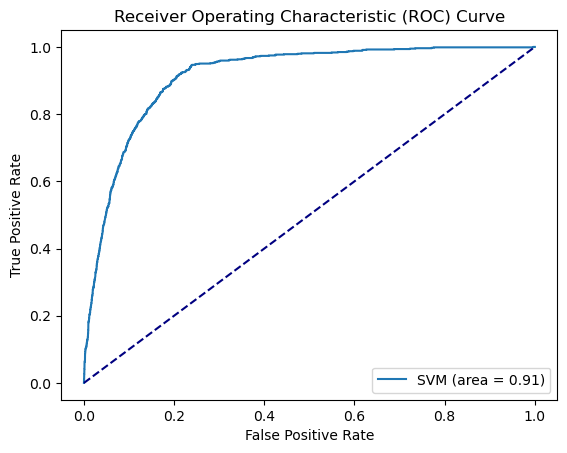

In [28]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc_svm_15)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Unlike model parameters (which are learned from the data, such as the coefficients in linear regression), hyperparameters are set before training begins and guide the learning process.

SVM has several hyperparameters that can be fine-tuned to improve performance:

* **C (Regularization parameter)**: Controls the trade-off between maximizing the margin and minimizing the classification error. A small C value allows a wider margin, but with some misclassification.
* **Gamma (for 'rbf' kernel)**: Controls the influence of each data point. High gamma means the model tries to fit every point very closely (which may lead to overfitting).

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Define parameter grid
param_grid = {'C': [10], 'gamma': ['scale', 1, 1.5], 'kernel': ['rbf'], 'probability':[True]}

In [31]:
%%time
# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid_search.fit(X_train_15, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=10, gamma=scale, kernel=rbf, probability=True;, score=0.835 total time= 2.5min
[CV 2/5] END C=10, gamma=scale, kernel=rbf, probability=True;, score=0.897 total time= 2.9min
[CV 3/5] END C=10, gamma=scale, kernel=rbf, probability=True;, score=0.894 total time= 3.3min
[CV 4/5] END C=10, gamma=scale, kernel=rbf, probability=True;, score=0.893 total time= 3.5min
[CV 5/5] END C=10, gamma=scale, kernel=rbf, probability=True;, score=0.893 total time= 4.4min
[CV 1/5] END C=10, gamma=1, kernel=rbf, probability=True;, score=0.847 total time= 4.4min
[CV 2/5] END C=10, gamma=1, kernel=rbf, probability=True;, score=0.905 total time= 4.9min
[CV 3/5] END C=10, gamma=1, kernel=rbf, probability=True;, score=0.905 total time= 6.7min
[CV 4/5] END C=10, gamma=1, kernel=rbf, probability=True;, score=0.906 total time=10.7min
[CV 5/5] END C=10, gamma=1, kernel=rbf, probability=True;, score=0.904 total time=12.2min
[CV 1/5] END C=10, g

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10], 'gamma': ['scale', 1, 1.5],
                         'kernel': ['rbf'], 'probability': [True]},
             verbose=3)

In [32]:
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}


In [33]:
# Use the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_

In [34]:
# Predict on the test set
y_pred_15_best = best_svm.predict(X_test_15)
y_pred_15_best_proba = best_svm.predict_proba(X_test_15)[:, 1] 

In [35]:
# Evaluate the model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_15_best))
print(classification_report(y_test, y_pred_15_best))

SVM Performance:
Accuracy: 0.8684383202099738
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5309
           1       0.49      0.74      0.59       787

    accuracy                           0.87      6096
   macro avg       0.73      0.81      0.76      6096
weighted avg       0.90      0.87      0.88      6096



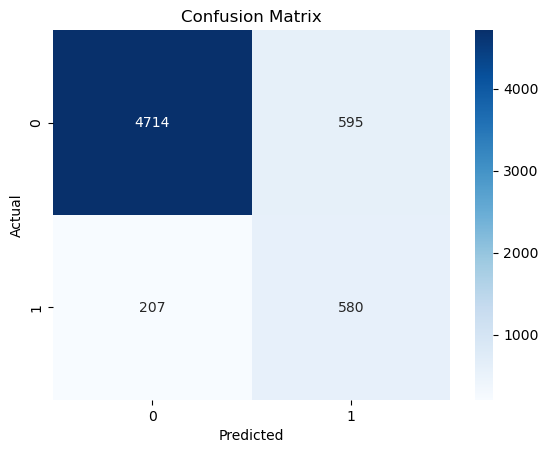

In [36]:
cm = confusion_matrix(y_test, y_pred_15_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

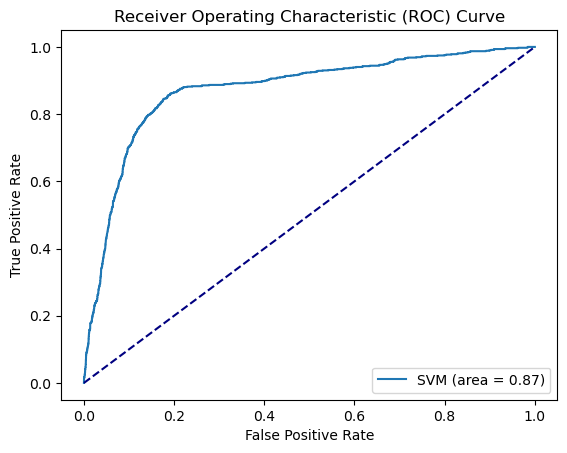

In [37]:
roc_auc_svm_best = roc_auc_score(y_test, y_pred_15_best_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_15_best_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % roc_auc_svm_best)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()